# e7 Validation - 10th October 2019

### Comparing reconstructions of 3min & 4h listmode data from the <sup>68</sup>Ge NEMA phantom

In [1]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## Extracting the data...

The data, taken from the scanner, was reconstructed on both the scanner's version of software and the "e7" software, run offline on a PC in the University of Manchester's Nuclear Physics Lab. 

From here, data was extracted using LIFEx.

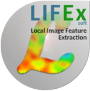

LIFEx is a free-to-download radiomics package, developed by a French collaboration including CEA and INSERM. Its useful GUI makes it a useful tool for ROI definition, and the capability of scripting to run for multiple patient files make it very suitable for this study.

Separate studies should be performed with LIFEx vs other radiomics feature extractors. 

17 datasets were created here. A 3 minute acquisition and a 4 hour acquisition were taken, and the data reconstructed on the scanner and e7 tools. Various configurations of OSEM with/without ToF and resolution recovery (PSF) were performed on each.

The data is stored in this folder. Each "patient" (i.e. image reconstruction) is saved in its own .xls file. A python program (writePatientList.py) was written to create the LIFEx script from the available image data. A separate .csv "log" file was created to be able to identify the protocols used for each reconstruction. The filepath prefix is given by **dataPrefix** below:

In [2]:
dataPrefix = "/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3/DATA_10_10_19/{}"

# "filepaths" is a list containing all relevant data .xls files (the first .xls file is from a separate study)
filepaths = sorted(glob(dataPrefix.format("*.xls")))[1:]

The following code writes all of the relevant data from the previously mentioned "log" .csv file into a dataframe, **logFileDF**. Features such as the originating system, TOF/PSF inclusion and the scanning time are all extracted from the filepath name and assigned separate columns. 

*NB - the dataframe has a column* "Filepath" *- this corresponds to the folder containing the DICOM images that the features were extracted from.* "datapath" *contains the files with the extracted features 

In [3]:
# Load up the log file into pandas dataframe
logFile = glob(dataPrefix.format("*.csv"))[0]
logFileDF = pd.read_csv(logFile)
sLength = len(logFileDF["PatientNumber"])

# Create new columns to make explicit some of the protocol features
logFileDF["System"] = pd.Series(np.random.randn(sLength), index=logFileDF.index)      # -- either "e7" or "scanner" 
logFileDF["TOF"] = pd.Series(np.random.randint(sLength), index=logFileDF.index)       # -- Binary 0/1 depending if TOF 
logFileDF["PSF"] = pd.Series(np.random.randint(sLength), index=logFileDF.index)       #    or PSF enabled 
logFileDF["ScanTime"] = pd.Series(np.random.randn(sLength), index=logFileDF.index)    # -- either 3mins/240mins (4 hrs)
logFileDF["datapath"] = pd.Series(np.random.randint(sLength), index=logFileDF.index)  # -- path to .xls file

# ....Now this is ugly, but this is the easiest way to operate multiple iterations through the dataframe without
# compilcations around the changing string in "Filepath"
for index,row in logFileDF.iterrows():
    logFileDF.loc[index,"Filepath"] = row["Filepath"].replace("/home/gn/SCANNER_DATA/GeNEMA_2Oct19/","")
for index,row in logFileDF.iterrows():
    logFileDF.loc[index,"System"] = row["Filepath"].split("/")[0]
for index,row in logFileDF.iterrows():
    logFileDF.loc[index,"Filepath"] = row["Filepath"].replace(row["Filepath"].split("/")[0],"")
for index,row in logFileDF.iterrows():
    if "TOF" in logFileDF.loc[index,"Filepath"] or "ToF" in logFileDF.loc[index,"Filepath"]:
        logFileDF.loc[index,"TOF"] = 1
    else:
        logFileDF.loc[index,"TOF"] = 0
    if "PSF" in logFileDF.loc[index,"Filepath"]:
        logFileDF.loc[index,"PSF"] = 1
    else:
        logFileDF.loc[index,"PSF"] = 0
for index,row in logFileDF.iterrows():
    if "-01-" in logFileDF.loc[index,"Filepath"] or "4hrs" in logFileDF.loc[index,"Filepath"] or " WB/" in logFileDF.loc[index,"Filepath"]:
        logFileDF.loc[index,"ScanTime"] = 240
    else:
        logFileDF.loc[index,"ScanTime"] = 3
i=0
for index,row in logFileDF.iterrows():
    logFileDF.loc[index,"datapath"] = filepaths[i]
    i+=1
    
# Show the finished article by uncommenting the line below:
#
logFileDF

,PatientNumber,Filepath,System,TOF,PSF,ScanTime,datapath
0,0,/GeNEMA_jsr_256-01-PSFTOF_000_000_ctm.v-DICOM/,e7,1,1,240.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
1,1,/GeNEMA_jsr_256-LM-00-PSFTOF_000_000_ctm.v-DICOM/,e7,1,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
2,2,/GeNEMA_jsr_256-00-OP_000_000_ctm.v-DICOM/,e7,0,0,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
3,3,/GeNEMA_jsr_256-LM-00-PSF_000_000_ctm.v-DICOM/,e7,0,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
4,4,/GeNEMA_jsr_256-WB-OP_000_000_ctm.v-DICOM/,e7,0,0,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
5,5,/GeNEMA_jsr_256-00-PSFTOF_000_000_ctm.v-DICOM/,e7,1,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
6,6,/GeNEMA_jsr_256-LM-00-OP_000_000_ctm.v-DICOM/,e7,0,0,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
7,7,/GeNEMA_jsr_256-WB-PSF_000_000_ctm.v-DICOM/,e7,0,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
8,8,/GeNEMA_jsr_256-WB-PSFTOF_000_000_ctm.v-DICOM/,e7,1,1,3.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...
9,9,/GeNEMA_jsr_256-01-PSF_000_000_ctm.v-DICOM/,e7,0,1,240.0,/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3...


Now, all data from the .xls files should be loaded into separate dataframes using pandas' `read_excel` function. The resulting dataframes are reasonably large (75 columns), and contain data from the 7 key regions in the <sup>68</sup>Ge NEMA phantom; the background (BG) and the six largest spheres (C1-6, in descending size order).

In [4]:
# Create a list to store all of the dataframes
dataDFList = []
for fp in filepaths:
    dataDFList.append(pd.read_excel(fp))
    
# Show an example by uncommenting the line below:
# 
ex = 4
dataDFList[ex]

,INFO_PatientName,INFO_PatientID,INFO_ProcessDateOfTexture,INFO_SeriesDate,INFO_Serie,INFO_ActualFrameDuration,INFO_NameOfRoi,CONVENTIONAL_SUVmin,CONVENTIONAL_SUVmean,CONVENTIONAL_SUVstd,...,GLZLM_LZE,GLZLM_LGZE,GLZLM_HGZE,GLZLM_SZLGE,GLZLM_SZHGE,GLZLM_LZLGE,GLZLM_LZHGE,GLZLM_GLNU,GLZLM_ZLNU,GLZLM_ZP
0,Ge-68_NEMA-IQ PHANTOM,1289-232,Wed Oct 09 11:28:22 BST 2019,2019-10-02,101001_GeNEMA_jsr_256-WB-OP_000_000_ctm.v 2i 2...,3.0 min,BG,0.007726,0.467211,0.149026,...,900754832,1,1,1.110180e-09,1.110180e-09,900754832,900754832,1,1,0.000003
1,Ge-68_NEMA-IQ PHANTOM,1289-232,Wed Oct 09 11:28:22 BST 2019,2019-10-02,101001_GeNEMA_jsr_256-WB-OP_000_000_ctm.v 2i 2...,3.0 min,C1,0.407608,1.111936,0.543175,...,9554281,1,1,1.046651e-07,1.046651e-07,9554281,9554281,1,1,0.000324
2,Ge-68_NEMA-IQ PHANTOM,1289-232,Wed Oct 09 11:28:22 BST 2019,2019-10-02,101001_GeNEMA_jsr_256-WB-OP_000_000_ctm.v 2i 2...,3.0 min,C2,0.411675,1.063601,0.447245,...,2013561,1,1,4.966326e-07,4.966326e-07,2013561,2013561,1,1,0.000705
3,Ge-68_NEMA-IQ PHANTOM,1289-232,Wed Oct 09 11:28:22 BST 2019,2019-10-02,101001_GeNEMA_jsr_256-WB-OP_000_000_ctm.v 2i 2...,3.0 min,C3,0.379713,0.929938,0.381563,...,855625,1,1,1.168736e-06,1.168736e-06,855625,855625,1,1,0.001081
4,Ge-68_NEMA-IQ PHANTOM,1289-232,Wed Oct 09 11:28:22 BST 2019,2019-10-02,101001_GeNEMA_jsr_256-WB-OP_000_000_ctm.v 2i 2...,3.0 min,C4,0.378981,0.848924,0.280182,...,267289,1,1,3.741269e-06,3.741269e-06,267289,267289,1,1,0.001934
5,Ge-68_NEMA-IQ PHANTOM,1289-232,Wed Oct 09 11:28:22 BST 2019,2019-10-02,101001_GeNEMA_jsr_256-WB-OP_000_000_ctm.v 2i 2...,3.0 min,C5,0.491212,0.802812,0.180054,...,66049,1,1,1.514027e-05,1.514027e-05,66049,66049,1,1,0.003891
6,Ge-68_NEMA-IQ PHANTOM,1289-232,Wed Oct 09 11:28:22 BST 2019,2019-10-02,101001_GeNEMA_jsr_256-WB-OP_000_000_ctm.v 2i 2...,3.0 min,C6,0.393132,0.696590,0.129831,...,15129,1,1,6.609822e-05,6.609822e-05,15129,15129,1,1,0.008130


Lets have a look at the features extracted by LIFEx. These will be the column titles of each of the dataframes in dataDFList. 

In [5]:
titles = [c for c in dataDFList[0].columns]
for t in titles:
    print(t)

INFO_PatientName
INFO_PatientID
INFO_ProcessDateOfTexture
INFO_SeriesDate
INFO_Serie
INFO_ActualFrameDuration
INFO_NameOfRoi
CONVENTIONAL_SUVmin 
CONVENTIONAL_SUVmean
CONVENTIONAL_SUVstd
CONVENTIONAL_SUVmax
CONVENTIONAL_SUVQ1
CONVENTIONAL_SUVQ2
CONVENTIONAL_SUVQ3
CONVENTIONAL_SUVpeak sphere 0.5mL  (value only for PET or NM)
CONVENTIONAL_SUVpeak sphere 1mL  (value only for PET or NM)
CONVENTIONAL_TLG (mL) (value only for PET or NM)
CONVENTIONAL_RIM_SUVmin
CONVENTIONAL_RIM_SUVmean
CONVENTIONAL_RIM_SUVstdev
CONVENTIONAL_RIM_SUVmax
CONVENTIONAL_RIM_SUV_Volume (# mL)
CONVENTIONAL_RIM_SUV_Volume (# vx)
CONVENTIONAL_RIM_SUVsum
HISTO_Skewness
HISTO_Kurtosis
HISTO_ExcessKurtosis
HISTO_Entropy_log10
HISTO_Entropy_log2
HISTO_Energy (=Uniformity)
SHAPE_Volume (mL)
SHAPE_Volume (# vx)
SHAPE_Sphericity (only for 3D ROI (nz>1)
SHAPE_Compacity only for 3D ROI (nz>1)
PARAMS_DistanceOfNeighbours
PARAMS_NumberOfGreyLevels
PARAMS_BinSize
PARAMS_IntensityResampling
PARAMS_BoundsRangeOfValueAfterDiscretisat

Change the feature you want to study by changing the string below to one of the members of the above list:

In [6]:
feature = "CONVENTIONAL_SUVmean"

We want to plot the data for all of the regions for comparable reconstruction procedures. Let's start by comparing the 3 minute OSEM with TOF and PSF. First we find out what indices for the data list by searching these parameters in the log dataframe:

In [7]:
# Set these to be the desired comparators: 
st = 3.           # scan time (3./240.)?
tof = 1             # ToF included?
psf = 1             # resolution recovery (PSF) included?

# Search for the correct indices in logFileDF
e7subj = logFileDF.index[(logFileDF["ScanTime"] == st) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
scannersubj = logFileDF.index[(logFileDF["ScanTime"] == st) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]

# Use these indices to select the correct feature list in dataDFList
e7data = dataDFList[e7subj][feature]
scannerdata = dataDFList[scannersubj][feature]

# Display both sets, just to check we're getting the right things:
print("DATA FROM THE e7 RECONSTRUCTION:\n")
print(e7data)
print("\nDATA FROM THE SCANNER RECONSTRUCTION:\n")
print(scannerdata)

# Convert these to lists to allow easier processing in later stages
e7data = e7data.tolist()
scannerdata = scannerdata.tolist()

DATA FROM THE e7 RECONSTRUCTION:

0    0.528019
1    1.134509
2    1.081711
3    0.946761
4    0.875886
5    0.834447
6    0.776164
Name: CONVENTIONAL_SUVmean, dtype: float64

DATA FROM THE SCANNER RECONSTRUCTION:

0    0.528051
1    1.134535
2    1.081735
3    0.946783
4    0.875910
5    0.834470
6    0.776188
Name: CONVENTIONAL_SUVmean, dtype: float64


For an initial test, let's see what the percentage difference between the e7- & scanner-reconstructed data looks like for the 3min and 4hr reconstructions over all 7 ROIs.

In [8]:
x = ["BG","S1","S2","S3","S4","S5","S6"]     # the 7 ROIs

# Set the 3min data
y3m = []
for i in range(0,len(e7data)):
    y3m.append(100*(scannerdata[i]-e7data[i])/scannerdata[i])
    
# Here we copy the code above to obtain the data for the 4 hour equivalent reconstructions
e7subj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
scannersubj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
e7d4h = dataDFList[e7subj4h][feature].tolist()
scannerd4h = dataDFList[scannersubj4h][feature]

# Set the 4hr data
y4h = []
for i in range(0,len(e7d4h)):
    y4h.append(100*(scannerd4h[i]-e7d4h[i])/scannerd4h[i])

Now let's plot...

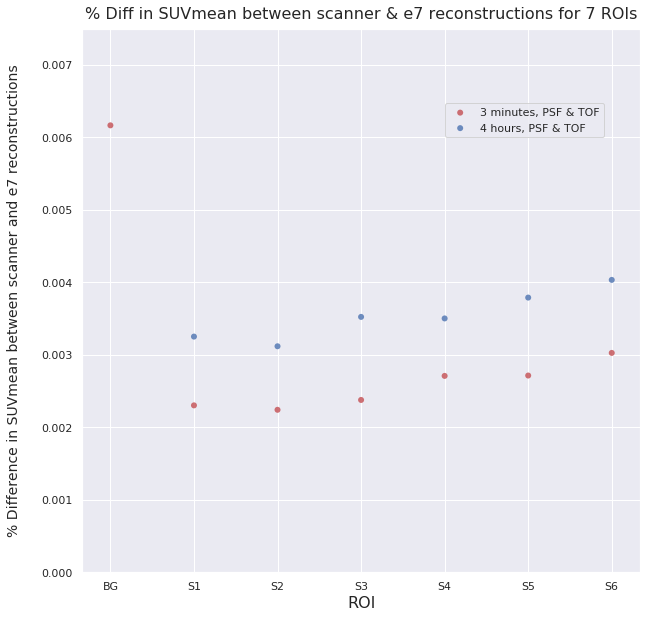

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
g1 = (x,y3m)
g2 = (x,y4h)
data = (g1,g2)
colors = ("r","b")
groups = ("3 minutes, PSF & TOF", "4 hours, PSF & TOF")
plt.ylim(0,0.0075)
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', label=group)
plt.title("% Diff in SUVmean between scanner & e7 reconstructions for 7 ROIs", size=16, pad=10)
plt.ylabel("% Difference in SUVmean between scanner and e7 reconstructions",labelpad=20, fontsize=14)
plt.xlabel("ROI", fontsize=16)
plt.legend(loc=(0.65,0.8))
#plt.savefig("diffplot_zoomed.png",format="png")
plt.show()

**NOTE** - the 4hr BG point is missing. This is because it appears at around -0.6%. The plot has been blown up to within these y-limits to demonstrate what appreciable difference there is between the two datasets.

As we can see, certainly for SUV mean, we have a negligible difference between the two reconstruction systems. 

It may be of interest to see why the BG for the 4 hour reconstruction is so different to the other ROI measurements.

## Let's now pull out some further features and examine the differences:

The below code iterates over all features and creates a plot for each.

It has been commented out for brevity; the plots are instead saved in `/home/gn/Analysis/GeNEMA/10_Oct_19/`

In [10]:
# for title in titles:

#     e7subj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
#     scannersubj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    
#     e7data = dataDFList[e7subj][title]
#     scannerdata = dataDFList[scannersubj][title]
#     e7data = e7data.tolist()
#     scannerdata = scannerdata.tolist()
#     e7subj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
#     scannersubj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
#     e7d4h = dataDFList[e7subj4h][title].tolist()
#     scannerd4h = dataDFList[scannersubj4h][title].tolist()
#     if not all(isinstance(e,str) for e in  e7data+scannerdata+e7d4h+scannerd4h) and 0 not in scannerdata+scannerd4h:
#         x = ["BG","S1","S2","S3","S4","S5","S6"]
#         y3m = []
#         for i in range(0,len(e7data)):
#             y3m.append(100*(scannerdata[i]-e7data[i])/scannerdata[i])
#         y4h = []
#         for i in range(0,len(e7d4h)):
#             y4h.append(100*(scannerd4h[i]-e7d4h[i])/scannerd4h[i])
#         fig = plt.figure(figsize=(10,10))
#         ax = fig.add_subplot(1, 1, 1)
#         g1 = (x,y3m)
#         g2 = (x,y4h)
#         data = (g1,g2)
#         colors = ("r","b")
#         groups = ("3 minutes, PSF & TOF", "4 hours, PSF & TOF")
#         #plt.ylim(0,0.0075)
#         for data, color, group in zip(data, colors, groups):
#             x, y = data
#             ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', label=group)
#         plt.title(title + "PLOT:", size=16, pad=10)
#         plt.ylabel("% Difference in {}".format(title),labelpad=20, fontsize=14)
#         plt.xlabel("ROI", fontsize=16)
#         plt.legend(loc=(0.65,0.8))
#         #plt.savefig("diffplot_{}.png".format(title),format="png")
#         #plt.show()
#         plt.close()


Can we find some illustration of the maximum percentage differences between them though? 

First, let's take out all of the "Params" and text-based features, and plot the 'max' % difference value from each of the feature sets.

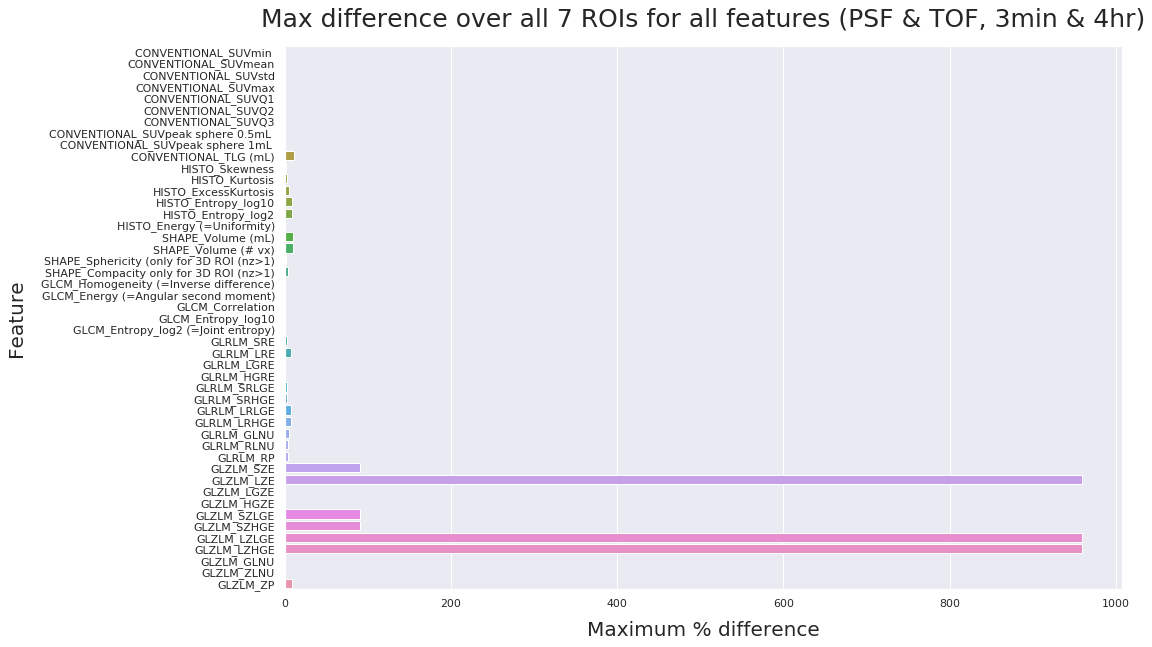

In [16]:
# We'll want to append to new arrays
x = []
maxdiff = []

for title in titles:
    
    # As before, collect all of the datasets........
    
    e7subj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7data = dataDFList[e7subj][title]
    scannerdata = dataDFList[scannersubj][title]
    e7data = e7data.tolist()
    scannerdata = scannerdata.tolist()
    e7subj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7d4h = dataDFList[e7subj4h][title].tolist()
    scannerd4h = dataDFList[scannersubj4h][title].tolist()
    
    # Apply conditions; we only want the numerical features, which have to be non-zero in order to satisfy a
    # "percentage difference" calculation
    #
    # Note as well, the "params" features will be equal for every dataset, so their inclusion is superfluous here.
    if not all(isinstance(e,str) for e in  e7data+scannerdata+e7d4h+scannerd4h) and 0 not in scannerdata+scannerd4h and "PARAMS" not in title:
        y3m = []
        for i in range(0,len(e7data)):
            y3m.append(100*(scannerdata[i]-e7data[i])/scannerdata[i])
        y4h = []
        for i in range(0,len(e7d4h)):
            y4h.append(100*(scannerd4h[i]-e7d4h[i])/scannerd4h[i])
        x.append(title)
        maxdiff.append(max([abs(y) for y in y3m+y4h]))

x = [i.replace(" (value only for PET or NM)","") for i in x]
fig = plt.figure(figsize=(15,10))
#plt.tight_layout()
ax = fig.add_subplot(1, 1, 1)
sns.barplot(y=x,x=maxdiff)
#plt.xticks(rotation='vertical',fontsize=15)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("Max difference over all 7 ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot.png",format='png', bbox_inches = "tight")
plt.show()
plt.close()

It seems like a lot of the texture matrix-based features are causing huge differences. 

For now, let's exclude those and just examine the non-texture matrix features.

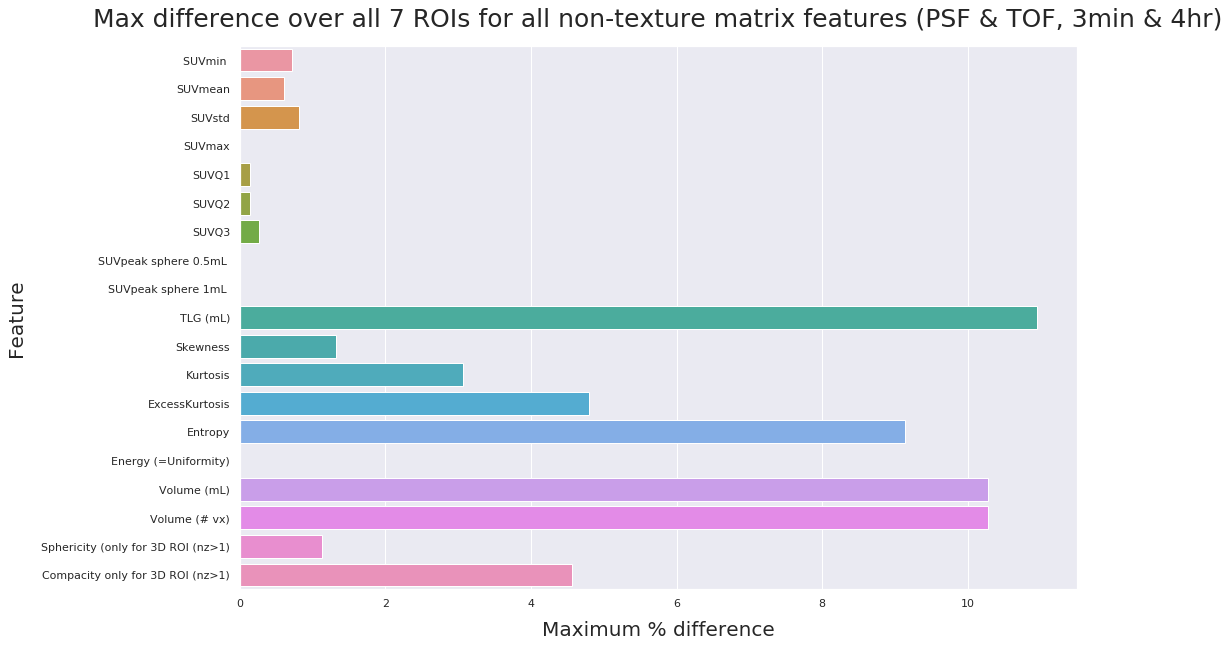

In [14]:
# Copied from above....
x = []
maxdiff = []

for title in titles:
    e7subj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7data = dataDFList[e7subj][title]
    scannerdata = dataDFList[scannersubj][title]
    e7data = e7data.tolist()
    scannerdata = scannerdata.tolist()
    e7subj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7d4h = dataDFList[e7subj4h][title].tolist()
    scannerd4h = dataDFList[scannersubj4h][title].tolist()
    
    # EXTRA CONDITION: Remove texture matrix-based metrics by excluding features with "GL" in the title
    if not all(isinstance(e,str) for e in  e7data+scannerdata+e7d4h+scannerd4h) and 0 not in scannerdata+scannerd4h and "PARAMS" not in title and "GL" not in title:
        y3m = []
        for i in range(0,len(e7data)):
            y3m.append(100*(scannerdata[i]-e7data[i])/scannerdata[i])
        y4h = []
        for i in range(0,len(e7d4h)):
            y4h.append(100*(scannerd4h[i]-e7d4h[i])/scannerd4h[i])
        x.append(title)
        maxdiff.append(max([abs(y) for y in y3m+y4h]))

x = [i.replace(" (value only for PET or NM)","").split("_")[1] for i in x]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x=maxdiff,y=x)
#plt.xticks(rotation='vertical',fontsize=15)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("Max difference over all 7 ROIs for all non-texture matrix features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot_wo-texmats.png",format='png', bbox_inches = "tight")
plt.show()
plt.close()

Still a few issues here. The TLG (total lesion glycolysis, same as TGV) is high.

Part of my thinking here is - is this because of ROI definition? 

I had thought that the background ROI might contain some extraneous voxels. If I exclude the background ROI from the above plots, what do I get?

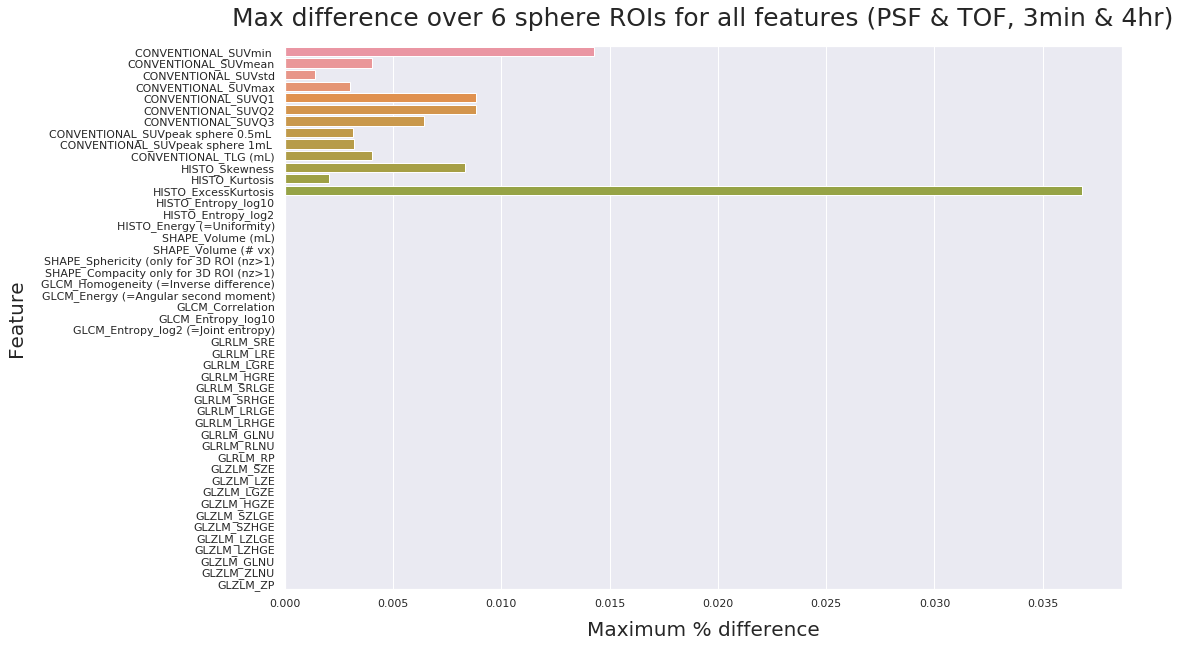

In [15]:
# FOR ALL FEATURES:

x = []
maxdiff = []
for title in titles:
    e7subj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj = logFileDF.index[(logFileDF["ScanTime"] == 3.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7data = dataDFList[e7subj][title]
    scannerdata = dataDFList[scannersubj][title]
    e7data = e7data.tolist()
    scannerdata = scannerdata.tolist()
    e7subj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "e7")].tolist()[0]
    scannersubj4h = logFileDF.index[(logFileDF["ScanTime"] == 240.) & (logFileDF["TOF"] == tof) & (logFileDF["PSF"] == psf) & (logFileDF["System"] == "scanner")].tolist()[0]
    e7d4h = dataDFList[e7subj4h][title].tolist()
    scannerd4h = dataDFList[scannersubj4h][title].tolist()
    if not all(isinstance(e,str) for e in  e7data+scannerdata+e7d4h+scannerd4h) and 0 not in scannerdata+scannerd4h and "PARAMS" not in title:
        y3m = []
        for i in range(0,len(e7data)):
            y3m.append(100*(scannerdata[i]-e7data[i])/scannerdata[i])
        y4h = []
        for i in range(0,len(e7d4h)):
            y4h.append(100*(scannerd4h[i]-e7d4h[i])/scannerd4h[i])
        x.append(title)
        maxdiff.append(max([abs(y) for y in y3m[1:]+y4h[1:]])) # taking out the first element in each array, corresponding to BG ROI

x = [i.replace(" (value only for PET or NM)","") for i in x]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(y=x,x=maxdiff)
#plt.xticks(rotation='vertical',fontsize=15)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("Max difference over 6 sphere ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot_wo_BG.png",format='png', bbox_inches = "tight")
plt.show()
plt.close()

### This is fairly conclusive...........

..................should redefine the ROIs. 

The texture matrices rely on binning the voxel values into a (relatively small, either 64 or 128) preset number of gray level bins. Seeing as we are seeing such minute differences in the SUV-based values, it seems natural that small differences in voxel values see the same binning "patterns" applied in both cases, and thus the features derived would be equal.

`END OF NOTEBOOK: 11th October 2019`

GN